Missing values in the dataset:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
Confusion Matrix:
[[79 20]
 [27 28]]
Accuracy: 0.6948
Error Rate: 0.3052
Precision: 0.5833
Recall: 0.5091
F1 Score: 0.5437


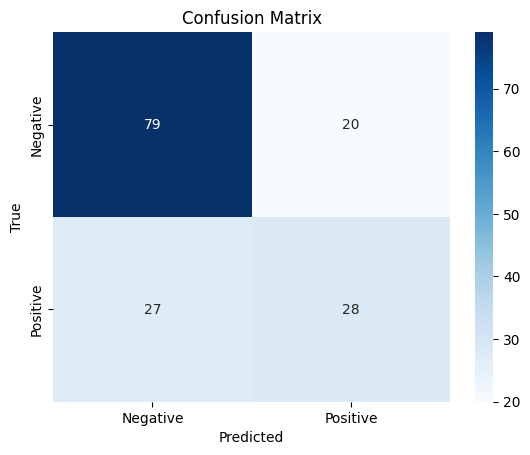

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Check for any missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Features and target variable
X = data.drop('Outcome', axis=1)  # Features (input)
y = data['Outcome']  # Target (label)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plotting Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[
            'Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()